In [144]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [216]:
orig = pd.read_csv("D://DataScience/Data/crime_data.csv")
print(orig.head(10))

    Unnamed: 0  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8


In [150]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Standardise

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
orig_scl = pd.DataFrame(scaler.fit_transform(orig.iloc[:,1:]))
orig_scl

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [151]:
import seaborn as sns

<AxesSubplot:>

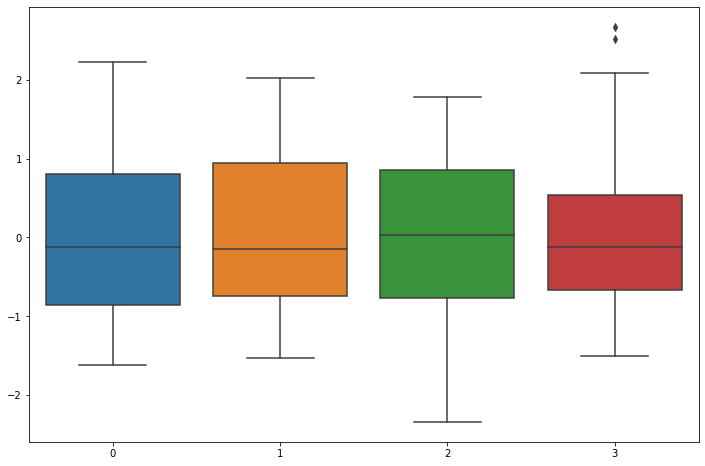

In [152]:
# Check for outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=orig_scl)

# Hierarchical

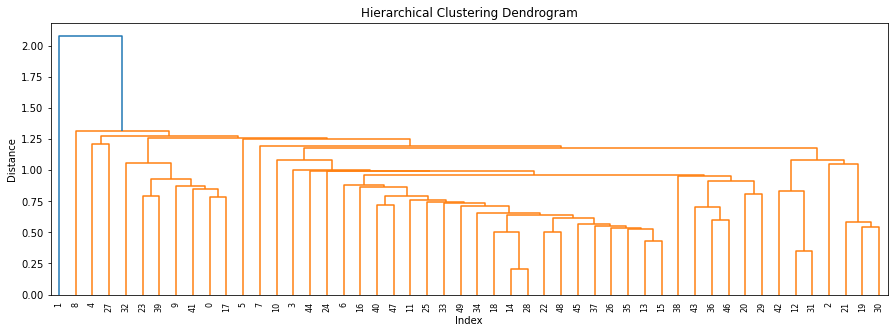

In [153]:
## Using single
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(orig_scl, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on Dendrogram 2 or 3 clusters can be formed

In [217]:
# Form Cluster and concatinate with original data set
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=2, linkage='single',affinity = "euclidean").fit(orig_scl) 

single_labels=pd.Series(h_complete.labels_)
print("Clusters",'',single_labels.unique())
orig['clust_s']=single_labels # creating a  new column and assigning it to new column 
single_labels.value_counts()

Clusters  [0 1]


0    49
1     1
dtype: int64

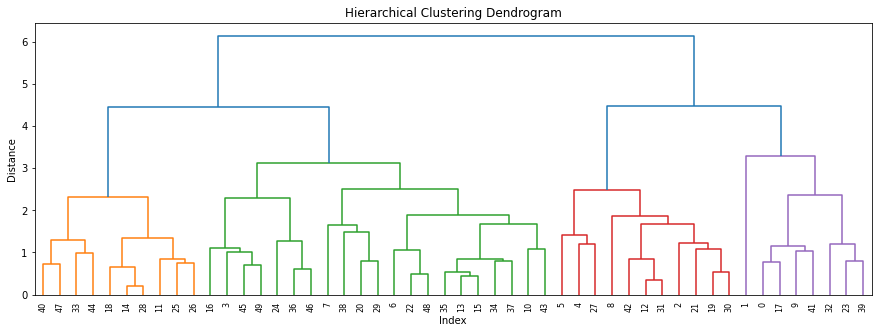

In [154]:
# Using Complete
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(orig_scl, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on Dendrogram 5 or 6 clusters can be choosen

In [218]:
# Form Cluster and concatinate with original data set
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(orig_scl) 

comp_labels=pd.Series(h_complete.labels_)
print("Clusters",'',comp_labels.unique())
orig['clust_c']=comp_labels # creating a  new column and assigning it to new column 
comp_labels.value_counts()

Clusters  [1 3 0 2 4]


2    21
0    11
4    10
1     7
3     1
dtype: int64

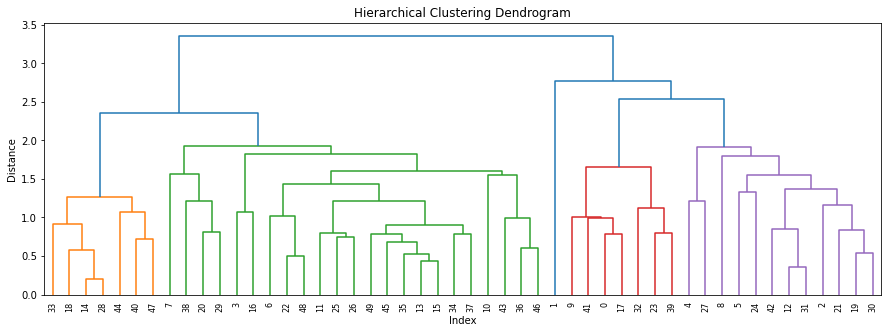

In [155]:
# Using Average
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(orig_scl, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on Dendrogram 3 clusters can be formed

In [219]:
# Form Cluster and concatinate with original data set
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(orig_scl) 

avg_labels=pd.Series(h_complete.labels_)
print("Clusters",'',avg_labels.unique())
orig['clust_a']=avg_labels # creating a  new column and assigning it to new column 
avg_labels.value_counts()

Clusters  [0 1 2]


2    30
0    19
1     1
dtype: int64

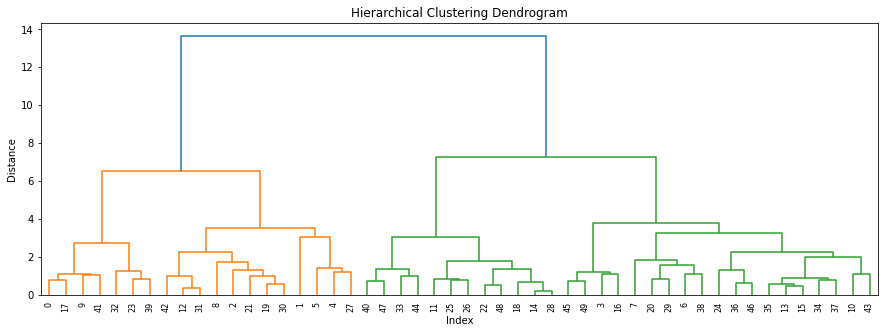

In [156]:
# Using ward
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(orig_scl, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on Dendrogram 5 or 6 clusters can be formed

In [220]:
# Form Cluster and concatinate with original data set
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='ward',affinity = "euclidean").fit(orig_scl) 

wrd_labels=pd.Series(h_complete.labels_)
print("Clusters",'',wrd_labels.unique())
orig['clust_w']=wrd_labels # creating a  new column and assigning it to new column 
wrd_labels.value_counts()

Clusters  [2 1 4 0 3]


0    16
3    12
4    11
2     7
1     4
dtype: int64

In [221]:
print(orig)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_s  clust_c  \
0          Alabama    13.2      236        58  21.2        0        1   
1           Alaska    10.0      263        48  44.5        1        3   
2          Arizona     8.1      294        80  31.0        0        0   
3         Arkansas     8.8      190        50  19.5        0        2   
4       California     9.0      276        91  40.6        0        0   
5         Colorado     7.9      204        78  38.7        0        0   
6      Connecticut     3.3      110        77  11.1        0        2   
7         Delaware     5.9      238        72  15.8        0        2   
8          Florida    15.4      335        80  31.9        0        0   
9          Georgia    17.4      211        60  25.8        0        1   
10          Hawaii     5.3       46        83  20.2        0        2   
11           Idaho     2.6      120        54  14.2        0        4   
12        Illinois    10.4      249        83  24.0

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

# K means

In [281]:
crime = pd.read_csv("D://DataScience/Data/crime_data.csv")
print(crime.head(10))

    Unnamed: 0  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8


### Normalization

In [282]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
crime_norm= pd.DataFrame(trans.fit_transform(crime.iloc[:,1:]))
print(crime_norm.head(10))

          0         1         2         3
0  0.746988  0.654110  0.440678  0.359173
1  0.554217  0.746575  0.271186  0.961240
2  0.439759  0.852740  0.813559  0.612403
3  0.481928  0.496575  0.305085  0.315245
4  0.493976  0.791096  1.000000  0.860465
5  0.427711  0.544521  0.779661  0.811370
6  0.150602  0.222603  0.762712  0.098191
7  0.307229  0.660959  0.677966  0.219638
8  0.879518  0.993151  0.813559  0.635659
9  1.000000  0.568493  0.474576  0.478036


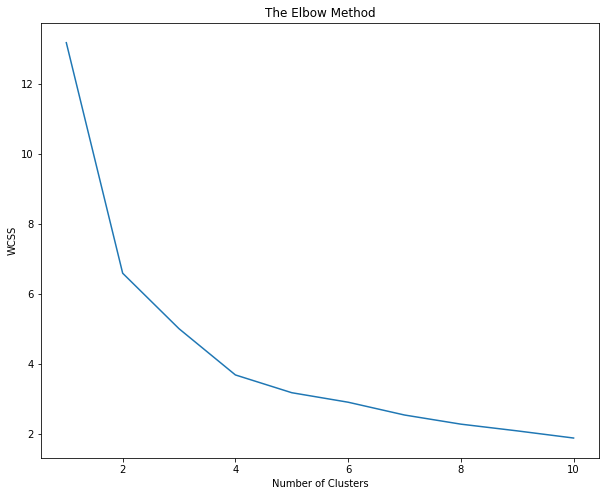

In [283]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(crime_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

### Determine the elbow point

In [284]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
    range(1, 11), WCSS, curve="convex", direction="decreasing"
)
kl.elbow

4

Based on Elbow curve, k=4 is fine

In [285]:
from sklearn.cluster import KMeans
clusters_k=KMeans(4,random_state=42)
clusters_k.fit(crime_norm)

KMeans(n_clusters=4, random_state=42)

In [286]:
clusters=pd.Series(clusters_k.labels_)
print("Clusters",'',clusters.unique())
crime['clust_k']=clusters # creating a  new column and assigning it to new column 
clusters.value_counts()

Clusters  [1 3 0 2]


0    17
2    13
3    12
1     8
dtype: int64

In [287]:
print(crime)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_k
0          Alabama    13.2      236        58  21.2        1
1           Alaska    10.0      263        48  44.5        3
2          Arizona     8.1      294        80  31.0        3
3         Arkansas     8.8      190        50  19.5        1
4       California     9.0      276        91  40.6        3
5         Colorado     7.9      204        78  38.7        3
6      Connecticut     3.3      110        77  11.1        0
7         Delaware     5.9      238        72  15.8        0
8          Florida    15.4      335        80  31.9        3
9          Georgia    17.4      211        60  25.8        1
10          Hawaii     5.3       46        83  20.2        0
11           Idaho     2.6      120        54  14.2        2
12        Illinois    10.4      249        83  24.0        3
13         Indiana     7.2      113        65  21.0        0
14            Iowa     2.2       56        57  11.3        2
15          Kansas     6